In [1]:
"""
Uses the Thorlabs TLPM_64.dll in order to communicate with the power meters
"""
import os
from ctypes import *

In [2]:
# load the DLL- if your path is different, this may need to change.
os.add_dll_directory(r"C:\Program Files (x86)\IVI Foundation\VISA\WinNT\Lib_x64\msc")
#lib = cdll.LoadLibrary("TLPM_64.dll")

<AddedDllDirectory('C:\\Program Files (x86)\\IVI Foundation\\VISA\\WinNT\\Lib_x64\\msc')>

In [3]:
lib = cdll.LoadLibrary(r"C:\Program Files (x86)\IVI Foundation\VISA\WinNT\Bin\TLPM_32.dll")

In [4]:
# find out if there are devices connected
deviceCount = c_ulong()
lib.TLPM_findRsrc(0, byref(deviceCount))

0

In [36]:
# find out if there are devices connected
deviceCount = c_ulong()
lib.TLPM_findRsrc(0, byref(deviceCount))

# if there are devices connected, determine their names
if deviceCount.value >= 1:
    meterName = create_string_buffer(256)

    # if there's only one device, open it- otherwise, ask which one
    if deviceCount.value == 1:
        lib.TLPM_getRsrcName(0, 0, meterName)
    else:
        print("Which Device?")
        for i in range(deviceCount.value):
            lib.TLPM_getRsrcName(0, i, meterName)
            print('#' + str(i + 1) + " " + meterName.value)
        device_num = input(">>>")
        lib.TLPM_getRsrcName(0, (device_num - 1), meterName)

    # Initialize the device- see manual for description of what arguments do
    sessionHandle = c_ulong(0)
    lib.TLPM_init(meterName, 0, 0, byref(sessionHandle))

    # Set Wavelength (given in nm)
    lib.TLPM_setWavelength(sessionHandle, c_double(633.0));
    # Set Averaging count
    lib.TLPM_setAvgCnt(sessionHandle, c_ushort(1000))
    # Set Unit- below sets to Watts
    lib.TLPM_setPowerUnit(sessionHandle, 0)
    # Measure Power
    power = c_longdouble(0.0)
    lib.TLPM_measPower(sessionHandle, byref(power))
    print('Power: ' + str(power.value) + " W")

    # close
    lib.TLPM_close(sessionHandle)
else:
    print("No connected power meters were detected. Check connections and installed drivers.")

Power: 0.0 W


In [4]:
import sys

In [5]:
sys.path.append('C:\Program Files (x86)\IVI Foundation\VISA\WinNT\TLPM\Example\Python') 

In [6]:
from TLPM import TLPM

In [7]:
from datetime import datetime
import time


tlPM = TLPM()
deviceCount = c_uint32()
tlPM.findRsrc(byref(deviceCount))

print("devices found: " + str(deviceCount.value))

resourceName = create_string_buffer(1024)

for i in range(0, deviceCount.value):
    tlPM.getRsrcName(c_int(i), resourceName)
    print(c_char_p(resourceName.raw).value)
    break

tlPM.close()

tlPM = TLPM()
#resourceName = create_string_buffer(b"COM1::115200")
#print(c_char_p(resourceName.raw).value)
tlPM.open(resourceName, c_bool(True), c_bool(True))

#message = create_string_buffer(1024)
#tlPM.getCalibrationMsg(message)
#print(c_char_p(message.raw).value)

#time.sleep(5)

power_measurements = []
times = []
count = 0
while count < 20:
    power =  c_double()
    tlPM.measPower(byref(power))
    power_measurements.append(power.value)
    times.append(datetime.now())
    print(power.value)
    count+=1
    time.sleep(.1)

tlPM.close()
print('End program')

devices found: 1
b'USB0::0x1313::0x8072::1916880::INSTR'
1.50353462e-05
1.11073759e-05
7.18125375e-06
-8.14707278e-07
3.66225464e-07
3.66225464e-07
1.53306374e-07
1.53306374e-07
7.42559649e-08
1.14378665e-07
1.06466771e-07
1.14378665e-07
1.09344825e-07
1.08161785e-07
1.0895041e-07
1.08783688e-07
1.0910032e-07
1.09021173e-07
1.09060743e-07
1.08981574e-07
End program


In [8]:
tlPM = TLPM()
tlPM.open(resourceName, c_bool(True), c_bool(True))

# Always sleep before taking measurements
time.sleep(5)

power_measurements = []
times = []
count = 0
while count < 20:
    power =  c_double()
    tlPM.measPower(byref(power))
    power_measurements.append(power.value)
    times.append(datetime.now())
    print(power.value)
    count+=1
    time.sleep(.1)

tlPM.close()
plt.plot(power_measurements)

1.09021173e-07
1.09060743e-07
1.08981574e-07
1.0910032e-07
1.09139918e-07
1.09021173e-07
1.09021173e-07
1.09060743e-07
1.08981574e-07
1.09021173e-07
1.08902427e-07
1.08862857e-07
1.09139918e-07
1.08902427e-07
1.08823258e-07
1.08902427e-07
1.08862857e-07
1.08981574e-07
1.08981574e-07
1.08981574e-07


NameError: name 'plt' is not defined

In [11]:
tlPM = TLPM()
tlPM.open(resourceName, c_bool(True), c_bool(True))

0

In [12]:
def MeasurePower(samples, sleep=0.1):
    power_measurements = []
    times = []
    count = 0
    while count < samples:
        power =  c_double()
        tlPM.measPower(byref(power))
        power_measurements.append(power.value)
        times.append(datetime.now())
        count+=1
        time.sleep(sleep)

    return power_measurements, times

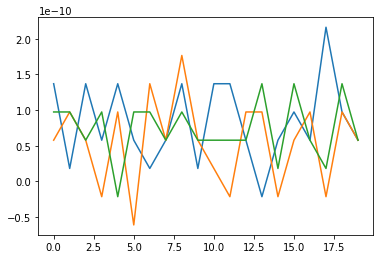

In [26]:
power1, times = MeasurePower(20)
power2, times = MeasurePower(20, sleep=1)
power3, times = MeasurePower(20, sleep=.01)
plt.plot(power1)
plt.plot(power2)
plt.plot(power3)

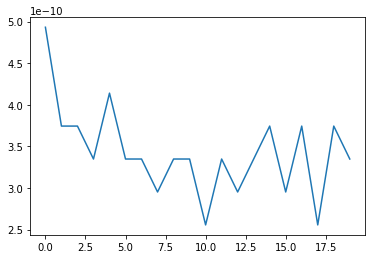

In [17]:
power_off, times = MeasurePower(20)
plt.plot(power_off)

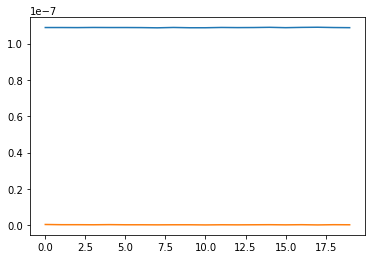

In [18]:
plt.plot(power)
plt.plot(power_off)

In [23]:
power, times = MeasurePower(15)

In [24]:
power_off, times = MeasurePower(15)
print(np.mean(power), np.mean(power_off))
print(np.std(power), np.std(power_off))

1.1069407853333335e-07 1.6861262465333332e-10
1.2303216229689454e-10 4.138820012211975e-11


In [10]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(power_measurements)

In [20]:
import numpy as np